<a href="https://colab.research.google.com/github/SreevanthPasham/keybrModel/blob/master/keybrModel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_absolute_error, r2_score
import matplotlib.pyplot as plt

data = [
    (84.8, 94.17, 2417), (95.1, 97.48, 5941), (65.5, 96.55, 3647),
    (93.2, 99.16,11650), (100.4,99.18,12860), (84.4, 99.17,10727),
    (91.0, 96.77, 4739), (78.3, 99.21,12334), (84.7,100.00,22356),
    (95.2, 95.04, 3621), (64.1, 99.17, 8530), (71.1, 99.18, 9111),
    (90.5, 94.12, 2963), (87.2,100.00,20926), (107.3,100.00,28086),
    (113.8, 98.32,10387), (88.0, 93.16, 2631), (93.7, 94.31, 2880),
    (117.3, 99.17,14904), (110.8, 97.46, 6539), (89.8, 95.73, 4029),
    (105.1, 98.33, 9669), (98.2,100.00,26345)
]

validation_data = [
    (100.4, 97.44, 6461), (103.6,98.4,9927),
    (100.9, 99.17, 11596), (105.8,96.58,5448),
    (104.8, 96.77, 5717), (113.8, 98.37, 9800),
    (90.0, 95.93, 4242), (92.9, 95.04, 3853),
    (97.6, 94.07, 3023), (100.5, 96.8, 5525),
    (111.4, 97.58,7253), (84.5, 95.8, 3685),
    (92.5, 96.61, 4805), (92.5, 100, 24429)
]

X = np.array([[wpm, acc] for wpm, acc, _ in data])
y = np.array([score for _, _, score in data])
X_val = np.array([[wpm, acc] for wpm, acc, _ in validation_data])
y_val = np.array([score for _, _, score in validation_data])

print("📊 Data Analysis:")
print(f"Training samples: {len(X)}")
print(f"Validation samples: {len(X_val)}")
print(f"Score range: {y.min():.0f} - {y.max():.0f}")
print(f"WPM range: {X[:, 0].min():.1f} - {X[:, 0].max():.1f}")
print(f"Accuracy range: {X[:, 1].min():.2f} - {X[:, 1].max():.2f}")


📊 Data Analysis:
Training samples: 23
Validation samples: 14
Score range: 2417 - 28086
WPM range: 64.1 - 117.3
Accuracy range: 93.16 - 100.00


In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_val_scaled = scaler.transform(X_val)

degrees = [1,2,3,4,5,6,7]
models = {}
results = {}

for degree in degrees:
    print(f"\n🔍 Testing Polynomial Degree {degree}:")

    poly = PolynomialFeatures(degree=degree, include_bias=False)
    X_poly = poly.fit_transform(X_scaled)
    X_val_poly = poly.transform(X_val_scaled)

    for model_name, model_class in [("Linear", LinearRegression()), ("Ridge", Ridge(alpha=1.0))]:
        model = model_class
        model.fit(X_poly, y)

        cv_scores = cross_val_score(model, X_poly, y, cv=5, scoring='neg_mean_absolute_error')
        cv_mae = -cv_scores.mean()

        val_pred = model.predict(X_val_poly)
        val_mae = mean_absolute_error(y_val, val_pred)
        val_r2 = r2_score(y_val, val_pred)

        key = f"{model_name}_deg{degree}"
        models[key] = (model, poly, scaler)
        results[key] = {
            'cv_mae': cv_mae,
            'val_mae': val_mae,
            'val_r2': val_r2,
            'predictions': val_pred
        }

        print(f"  {model_name:6} - CV MAE: {cv_mae:6.0f}, Val MAE: {val_mae:6.0f}, Val R²: {val_r2:.3f}")

best_key = min(results.keys(), key=lambda k: results[k]['val_mae'])
best_model, best_poly, best_scaler = models[best_key]
best_results = results[best_key]

print(f"\n🏆 Best Model: {best_key}")
print(f"Validation MAE: {best_results['val_mae']:.0f}")
print(f"Validation R²: {best_results['val_r2']:.3f}")



🔍 Testing Polynomial Degree 1:
  Linear - CV MAE:   4324, Val MAE:   3317, Val R²: 0.495
  Ridge  - CV MAE:   4184, Val MAE:   3305, Val R²: 0.491

🔍 Testing Polynomial Degree 2:
  Linear - CV MAE:   2838, Val MAE:   2078, Val R²: 0.801
  Ridge  - CV MAE:   2679, Val MAE:   1607, Val R²: 0.856

🔍 Testing Polynomial Degree 3:
  Linear - CV MAE:   3113, Val MAE:    959, Val R²: 0.941
  Ridge  - CV MAE:   2384, Val MAE:    840, Val R²: 0.945

🔍 Testing Polynomial Degree 4:
  Linear - CV MAE:   6341, Val MAE:    662, Val R²: 0.949
  Ridge  - CV MAE:   1891, Val MAE:    794, Val R²: 0.961

🔍 Testing Polynomial Degree 5:
  Linear - CV MAE:  41440, Val MAE:   2240, Val R²: 0.485
  Ridge  - CV MAE:   2253, Val MAE:    469, Val R²: 0.980

🔍 Testing Polynomial Degree 6:
  Linear - CV MAE:  12726, Val MAE:   2745, Val R²: 0.182
  Ridge  - CV MAE:   3159, Val MAE:    586, Val R²: 0.980

🔍 Testing Polynomial Degree 7:
  Linear - CV MAE:  11323, Val MAE:    809, Val R²: 0.945
  Ridge  - CV MAE:   5

In [ ]:
if hasattr(best_model, 'coef_'):
    feature_names = best_poly.get_feature_names_out(['WPM', 'Accuracy'])
    print(f"\n🔎 Best Model Formula ({best_key}):")
    for name, coef in zip(feature_names, best_model.coef_):
        if abs(coef) > 0.01:  # Only show significant coefficients
            print(f"  {coef:8.2f} * {name}")
    print(f"  {best_model.intercept_:8.2f} (intercept)")

def predict_score(wpm, accuracy):
    """Predict score using the best trained model"""
    input_scaled = best_scaler.transform([[wpm, accuracy]])
    input_poly = best_poly.transform(input_scaled)
    return best_model.predict(input_poly)[0]

print(f"\n📋 Validation Results ({best_key}):")
print("Sample | Predicted | Actual | Error | Error %")
print("-" * 45)
for i, (pred, actual) in enumerate(zip(best_results['predictions'], y_val)):
    error = abs(pred - actual)
    error_pct = (error / actual) * 100
    print(f"{i+1:6} | {pred:9.0f} | {actual:6} | {error:5.0f} | {error_pct:6.1f}%")

print(f"\nAverage Error: {best_results['val_mae']:.0f}")
print(f"Average Error %: {(best_results['val_mae'] / y_val.mean()) * 100:.1f}%")



🔎 Best Model Formula (Ridge_deg5):
    467.03 * WPM
   3200.22 * Accuracy
    302.58 * WPM^2
    544.60 * WPM Accuracy
   1535.92 * Accuracy^2
    511.28 * WPM^3
    749.10 * WPM^2 Accuracy
    575.39 * WPM Accuracy^2
   3538.64 * Accuracy^3
   -222.33 * WPM^4
    260.78 * WPM^3 Accuracy
    219.25 * WPM^2 Accuracy^2
    616.10 * WPM Accuracy^3
   3196.72 * Accuracy^4
   -144.00 * WPM^5
   -138.09 * WPM^4 Accuracy
   -222.31 * WPM^3 Accuracy^2
    559.10 * WPM^2 Accuracy^3
    206.60 * WPM Accuracy^4
    820.34 * Accuracy^5
   6625.52 (intercept)

📋 Validation Results (Ridge_deg5):
Sample | Predicted | Actual | Error | Error %
---------------------------------------------
     1 |      6779 |   6461 |   318 |    4.9%
     2 |      9424 |   9927 |   503 |    5.1%
     3 |     13409 |  11596 |  1813 |   15.6%
     4 |      5400 |   5448 |    48 |    0.9%
     5 |      5799 |   5717 |    82 |    1.4%
     6 |      9852 |   9800 |    52 |    0.5%
     7 |      4277 |   4242 |    35 |    0

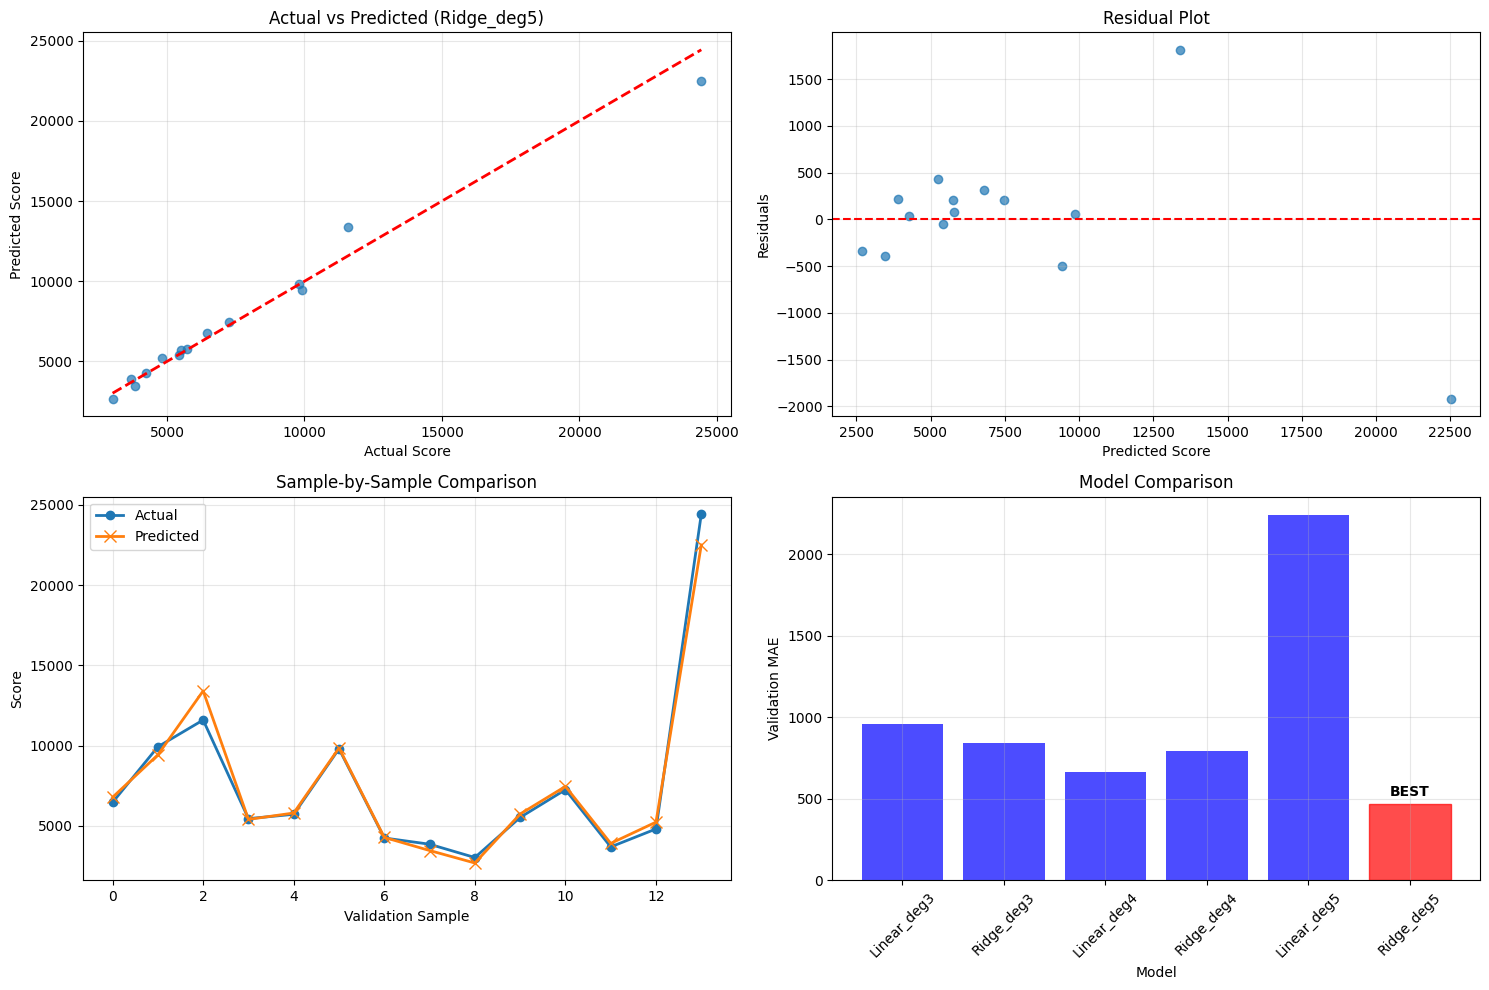


📊 Model Performance Summary:
Average Validation Error: 469 points
Average Error Percentage: 6.2%
R² Score: 0.980
Best Model: Ridge_deg5


In [ ]:
plt.figure(figsize=(15, 10))

# Plot 1: Actual vs Predicted
plt.subplot(2, 2, 1)
plt.scatter(y_val, best_results['predictions'], alpha=0.7)
plt.plot([y_val.min(), y_val.max()], [y_val.min(), y_val.max()], 'r--', lw=2)
plt.xlabel('Actual Score')
plt.ylabel('Predicted Score')
plt.title(f'Actual vs Predicted ({best_key})')
plt.grid(True, alpha=0.3)

# Plot 2: Residuals
plt.subplot(2, 2, 2)
residuals = best_results['predictions'] - y_val
plt.scatter(best_results['predictions'], residuals, alpha=0.7)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Score')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.grid(True, alpha=0.3)

# Plot 3: Validation samples comparison
plt.subplot(2, 2, 3)
indices = range(len(y_val))
plt.plot(indices, y_val, 'o-', label='Actual', linewidth=2, markersize=6)
plt.plot(indices, best_results['predictions'], 'x-', label='Predicted', linewidth=2, markersize=8)
plt.xlabel('Validation Sample')
plt.ylabel('Score')
plt.title('Sample-by-Sample Comparison')
plt.legend()
plt.grid(True, alpha=0.3)

# Plot 4: Model comparison
plt.subplot(2, 2, 4)
model_names = list(results.keys())
mae_values = [results[k]['val_mae'] for k in model_names]
colors = ['red' if k == best_key else 'blue' for k in model_names]
bars = plt.bar(range(len(model_names)), mae_values, color=colors, alpha=0.7)
plt.xlabel('Model')
plt.ylabel('Validation MAE')
plt.title('Model Comparison')
plt.xticks(range(len(model_names)), model_names, rotation=45)
plt.grid(True, alpha=0.3)

for i, (bar, name) in enumerate(zip(bars, model_names)):
    if name == best_key:
        bar.set_color('red')
        plt.text(i, mae_values[i] + 50, 'BEST', ha='center', fontweight='bold')

plt.tight_layout()
plt.show()

print(f"\n📊 Model Performance Summary:")
print(f"Average Validation Error: {best_results['val_mae']:.0f} points")
print(f"Average Error Percentage: {(best_results['val_mae'] / y_val.mean()) * 100:.1f}%")
print(f"R² Score: {best_results['val_r2']:.3f}")
print(f"Best Model: {best_key}")


In [ ]:
feature_names = best_poly.get_feature_names_out(['WPM', 'Accuracy'])
coefficients = best_model.coef_
intercept = best_model.intercept_

print("Score = ", end="")
for i, (name, coef) in enumerate(zip(feature_names, coefficients)):
    if i == 0:
        print(f"{coef:.6f} * {name}", end="")
    else:
        if coef >= 0:
            print(f" + {coef:.6f} * {name}", end="")
        else:
            print(f" - {abs(coef):.6f} * {name}", end="")

if intercept >= 0:
    print(f" + {intercept:.6f}")
else:
    print(f" - {abs(intercept):.6f}")

Score = 467.031772 * WPM + 3200.221928 * Accuracy + 302.580540 * WPM^2 + 544.597642 * WPM Accuracy + 1535.915989 * Accuracy^2 + 511.276493 * WPM^3 + 749.101700 * WPM^2 Accuracy + 575.385906 * WPM Accuracy^2 + 3538.636497 * Accuracy^3 - 222.325431 * WPM^4 + 260.775427 * WPM^3 Accuracy + 219.247662 * WPM^2 Accuracy^2 + 616.101105 * WPM Accuracy^3 + 3196.723740 * Accuracy^4 - 143.997431 * WPM^5 - 138.089670 * WPM^4 Accuracy - 222.308291 * WPM^3 Accuracy^2 + 559.099874 * WPM^2 Accuracy^3 + 206.604684 * WPM Accuracy^4 + 820.341843 * Accuracy^5 + 6625.518396


In [ ]:
def predict_score(wpm, accuracy):
    """
    Predict typing test score based on WPM and accuracy

    Args:
        wpm (float): Words per minute
        accuracy (float): Accuracy percentage (e.g., 95.5 for 95.5%)

    Returns:
        float: Predicted score
    """
    input_scaled = best_scaler.transform([[wpm, accuracy]])
    input_poly = best_poly.transform(input_scaled)
    predicted_score = best_model.predict(input_poly)[0]
    return predicted_score

In [ ]:
wpm = 95.4
accuracy = 95.93
pred_score = predict_score(wpm,accuracy) # Predicted Score = 4559, Actual Score = 4107,
print(f"WPM: {wpm}, Accuracy: {accuracy}% → Predicted Score: {pred_score:.0f}")
percent_error= ((abs(pred_score - 4107)) / 4107) * 100
print(f"Percent Error: {percent_error: .2f}")

WPM: 95.4, Accuracy: 95.93% → Predicted Score: 4324
Percent Error:  5.29
